In [1]:
# only inference

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

In [2]:
# fix for 'cudNN failed to initialize error .. '
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
saved_model_dir = "./saved_model"
model = keras.models.load_model(saved_model_dir)

In [28]:
def preprocess(img):
#     plt.imshow(img, cmap='gray')
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # blank white image
    
    # crop
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    final_img[:h, :w] = img
    print(final_img)
    plt.imshow(final_img, cmap='gray')
    final_img = cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)
#     plt.imshow(final_img, cmap='gray')
    final_img = final_img/255.
    final_img = final_img.reshape(1, 256, 64, 1)
    return final_img

In [5]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 64 # max length of predicted labels


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [42]:
img_dir = "/home/archeron/dev/data/handwriting_recognition_kaggle/test_v2/test/"
img_name = "TEST_19177.jpg"
test_img = img_dir + img_name

In [38]:
test_img = "./app/test_img.jpg"

(44, 324)

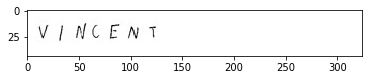

In [43]:
# read image
image = cv2.imread(test_img, cv2.IMREAD_GRAYSCALE)
# plot image
plt.imshow(image, cmap='gray')
image.shape

In [44]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


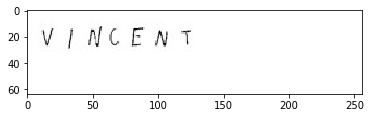

In [45]:
# preprocess
image = preprocess(image)

In [46]:
# predict image text
pred = model.predict(image)
# decode ctc 
decoded = K.get_value(K.ctc_decode(pred, 
           
                                   
                                   
                                   
                                   
                                   
                                   
                                   
                                   input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                   greedy=True)[0][0])
predicted_text = num_to_label(decoded[0])
print("Prediction: "+ predicted_text)

Prediction: VINCENT


In [ ]:
preds = model.predict(inference_images)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(len(inference_images)):
    prediction.append(num_to_label(decoded[i]))